# Lab7: Seeds Dataset – K-Means and PCA

## Author: Dianna Hummel

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

##### Step A

In [2]:
seeds_data = pd.read_csv("seeds.csv", header = None) 
cols = ['area','perimeter','compact',
           'length', 'width','asym','groove','species']
seeds_data.columns = cols
seeds_data.head(10)

,area,perimeter,compact,length,width,asym,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
seeds_data.tail(10)

,area,perimeter,compact,length,width,asym,groove,species
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [4]:
seeds_data.shape

(210, 8)

In [5]:
seeds_data.dtypes

area         float64
perimeter    float64
compact      float64
length       float64
width        float64
asym         float64
groove       float64
species        int64
dtype: object

In [6]:
seeds_data.groupby(['species']).describe().T

species                  1          2          3
area      count  70.000000  70.000000  70.000000
          mean   14.334429  18.334286  11.873857
          std     1.215704   1.439496   0.723004
          min    11.230000  15.380000  10.590000
          25%    13.750000  17.330000  11.262500
          50%    14.355000  18.720000  11.835000
          75%    15.045000  19.137500  12.425000
          max    17.080000  21.180000  13.370000
asym      count  70.000000  70.000000  70.000000
          mean    2.667403   3.644800   4.788400
          std     1.173901   1.181868   1.336465
          min     0.765100   1.472000   1.661000
          25%     1.826500   2.845500   4.048750
          50%     2.545500   3.609500   4.839000
          75%     3.301000   4.436000   5.467250
          max     6.685000   6.682000   8.456000
compact   count  70.000000  70.000000  70.000000
          mean    0.880070   0.883517   0.849409
          std     0.016191   0.015500   0.021760
          min     0.839200   0.845200   0.808100
          25%     0.868850   0.872525   0.834000
          50%     0.880500   0.882600   0.849350
          75%     0.890400   0.898225   0.861825
          max     0.918300   0.910800   0.897700
groove    count  70.000000  70.000000  70.000000
          mean    5.087214   6.020600   5.116400
          std     0.263699   0.253934   0.162068
          min     4.519000   5.144000   4.745000
          25%     4.924500   5.877500   5.002000
          50%     5.094000   5.981500   5.091500
          75%     5.223500   6.187750   5.228500
          max     5.877000   6.550000   5.491000
length    count  70.000000  70.000000  70.000000
          mean    5.508057   6.148029   5.229514
          std     0.231508   0.268191   0.138015
          min     4.902000   5.363000   4.899000
          25%     5.384500   5.979250   5.136250
          50%     5.534000   6.148500   5.224000
          75%     5.677000   6.312000   5.323750
          max     6.053000   6.675000   5.541000
perimeter count  70.000000  70.000000  70.000000
          mean   14.294286  16.135714  13.247857
          std     0.576583   0.616995   0.340196
          min    12.630000  14.660000  12.410000
          25%    13.960000  15.737500  13.002500
          50%    14.320000  16.210000  13.250000
          75%    14.732500  16.557500  13.470000
          max    15.460000  17.250000  13.950000
width     count  70.000000  70.000000  70.000000
          mean    3.244629   3.677414   2.853771
          std     0.177616   0.185539   0.147516
          min     2.850000   3.231000   2.630000
          25%     3.134250   3.554250   2.725500
          50%     3.243500   3.693500   2.834500
          75%     3.378500   3.804750   2.967000
          max     3.683000   4.033000   3.232000

##### Answer 1

Width, perimeter, length, area, groove

Species 3 is the smallest and species 2 is the largest.

In [7]:
seeds_data['species'].value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

##### Step B

In [8]:
seeds_corr = seeds_data.corr()
seeds_corr

,area,perimeter,compact,length,width,asym,groove,species
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compact,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
species,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [9]:
grps = ['NegStrong','NegMedium','Weak',
        'PosMedium', 'PosStrong']
cols = ['area','perimeter','compact',
           'length', 'width','asym','groove','species']
for col in cols:
    seeds_corr[col] = pd.cut (seeds_corr[col], 
         (-1,-0.8,-0.6,0.6,0.8,1), labels = grps)
seeds_corr

,area,perimeter,compact,length,width,asym,groove,species
area,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosStrong,Weak
perimeter,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
compact,PosMedium,Weak,PosStrong,Weak,PosMedium,Weak,Weak,Weak
length,PosStrong,PosStrong,Weak,PosStrong,PosStrong,Weak,PosStrong,Weak
width,PosStrong,PosStrong,PosMedium,PosStrong,PosStrong,Weak,PosMedium,Weak
asym,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak
groove,PosStrong,PosStrong,Weak,PosStrong,PosMedium,Weak,PosStrong,Weak
species,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong


##### Answer 2

The least correlated features looks to be the asym (asymmetry coefficient)
and the compact (compactness).  I would say the other 5 features positively 
correlate because they all directly relate to the size of the seed and therefore, each other.

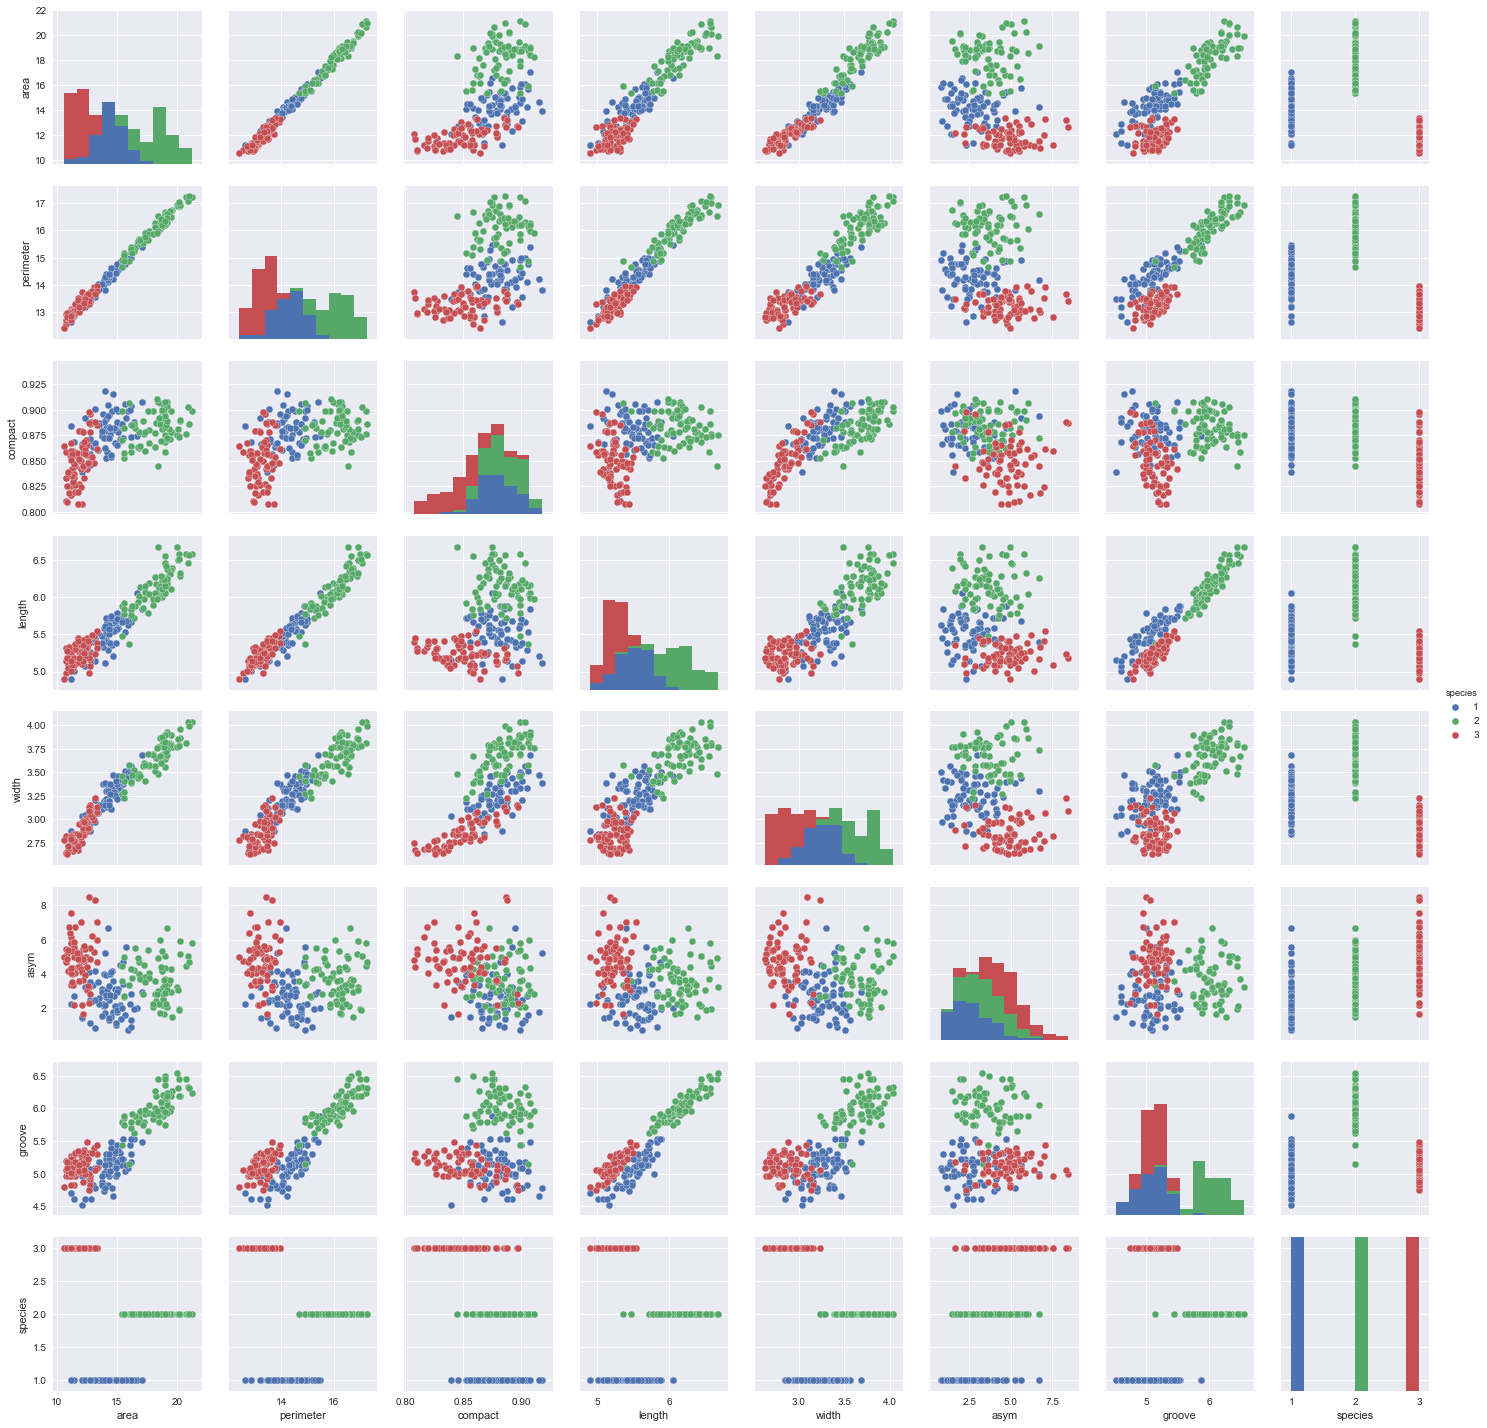

In [10]:
sns.pairplot (seeds_data, hue='species', size=2.5)

###### Answer 3

I would say that the shapes of the scatterplots do reflect the correlation
of the features plotted because you can see on the less correlated items the 
points are spread out more; whereas the stronger correlated items the points 
tighter together.

In [11]:
spec_cat = pd.factorize (seeds_data['species'])
Y_seeds = spec_cat[0]
seeds_cols = ['area','perimeter','compact',
           'length', 'width','asym','groove','species']
Y_seeds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

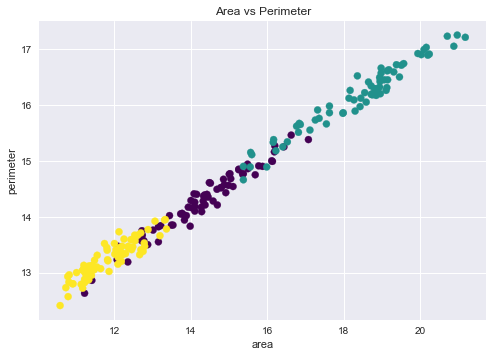

In [12]:
x = 0  # area
y = 1  # perimeter
plt.scatter(seeds_data.iloc[:,x], seeds_data.iloc[:,y],
            c = Y_seeds,
            s = 50, 
            cmap = 'viridis')
plt.title ("Area vs Perimeter")
plt.xlabel (seeds_cols[x])
plt.ylabel (seeds_cols[y])

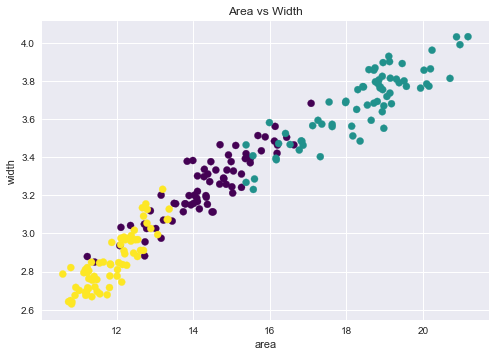

In [13]:
x = 0  # area
y = 4  # width
plt.scatter(seeds_data.iloc[:,x], seeds_data.iloc[:,y],
            c = Y_seeds,
            s = 50, 
            cmap = 'viridis')
plt.title ("Area vs Width")
plt.xlabel (seeds_cols[x])
plt.ylabel (seeds_cols[y])

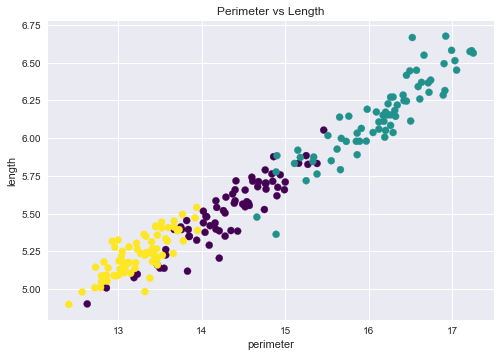

In [14]:
x = 1  # perimeter
y = 3  # length
plt.scatter(seeds_data.iloc[:,x], seeds_data.iloc[:,y],
            c = Y_seeds,
            s = 50, 
            cmap = 'viridis')
plt.title ("Perimeter vs Length")
plt.xlabel (seeds_cols[x])
plt.ylabel (seeds_cols[y])

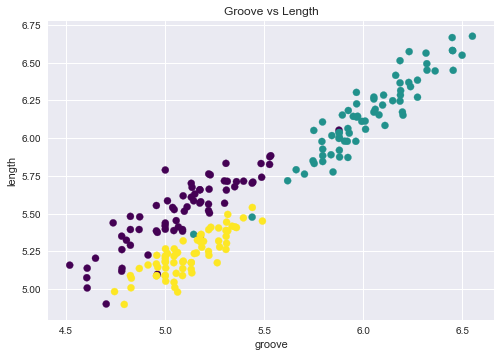

In [15]:
x = 6  # groove
y = 3  # length
plt.scatter(seeds_data.iloc[:,x], seeds_data.iloc[:,y],
            c = Y_seeds,
            s = 50, 
            cmap = 'viridis')
plt.title ("Groove vs Length")
plt.xlabel (seeds_cols[x])
plt.ylabel (seeds_cols[y])

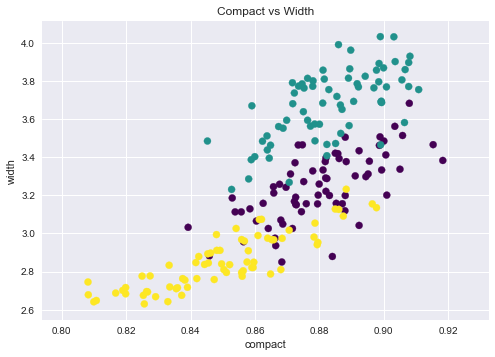

In [16]:
x = 2  # compact
y = 4  # width
plt.scatter(seeds_data.iloc[:,x], seeds_data.iloc[:,y],
            c = Y_seeds,
            s = 50, 
            cmap = 'viridis')
plt.title ("Compact vs Width")
plt.xlabel (seeds_cols[x])
plt.ylabel (seeds_cols[y])

##### Step C

In [17]:
X_seeds = seeds_data.drop ('species', axis=1)
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_seeds)
y_model = kmeans.predict (X_seeds)
y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1])

In [18]:
y_test = np.choose (Y_seeds,[2,0,1]).astype (int)
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

###### Answer 4

In [19]:
acc_score = accuracy_score (y_test, y_model)
print("Accuracy:", acc_score)

Accuracy: 0.895238095238


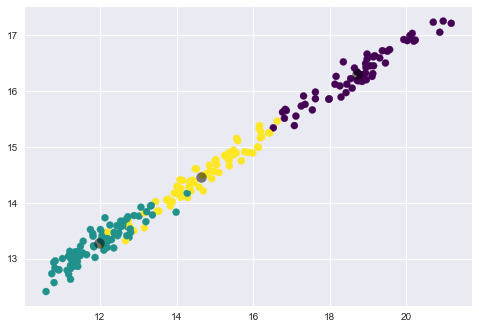

In [20]:
plt.scatter (X_seeds.iloc[:,0], X_seeds.iloc[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1],
             c = 'black', s = 100, alpha = 0.5)

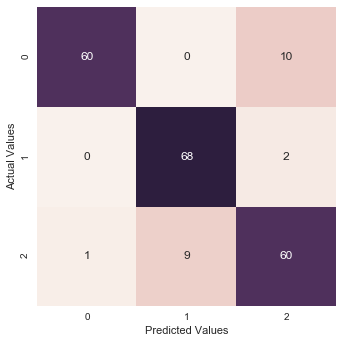

In [21]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')

###### Answer 5

Kama(2): C1 = 70, Rosa(1): C2 = 70, Canadian(0): C3 = 70 <br>
TC1 = 60, TC2 =68, TC3 = 60<br>
FC1C2 - NumOfRosa ClassAsKama = 2<br>
FC1C3 - NumOfCanadian ClassAsKama = 10<br>
FC2C1 - NumOfKama ClassAsRosa = 9<br>
FC2C3 - NumOfCanadian ClassAsRosa = 0<br>
FC3C1 - NumOfKama ClassAsCanadian = 1<br>
FC3C2 - NumOfRosa ClassAsCanadian = 0<br>
TC1R = 60/70, TC2R = 68/70, TC3R = 60/70

##### Step D

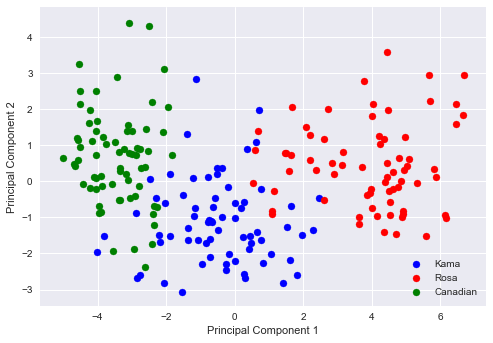

In [22]:
model = PCA (n_components=2) 
model.fit (X_seeds) 
X_2D = model.transform (X_seeds)
for label, color, i in zip(('Kama','Rosa','Canadian'),('blue','red','green'), (0, 1, 2)):
    plt.scatter (X_2D[Y_seeds == i, 0], 
                 X_2D[Y_seeds == i, 1], 
                 label=label, color=color)
plt.xlabel ('Principal Component 1')
plt.ylabel ('Principal Component 2')
plt.legend (loc='lower right')

##### Step E

In [23]:
X_std_seeds = StandardScaler().fit_transform(X_seeds)
X_std_seeds

array([[  1.42097769e-01,   2.15462437e-01,   6.06017918e-05, ...,
          1.41701823e-01,  -9.86151745e-01,  -3.83577423e-01],
       [  1.11880257e-02,   8.22375713e-03,   4.28515270e-01, ...,
          1.97432229e-01,  -1.78816620e+00,  -9.22013487e-01],
       [ -1.92066576e-01,  -3.60200562e-01,   1.44238325e+00, ...,
          2.08047544e-01,  -6.67479334e-01,  -1.18919199e+00],
       ..., 
       [ -5.67570840e-01,  -6.90247348e-01,   7.33948301e-01, ...,
         -7.06044846e-02,   3.07658816e+00,  -7.18060432e-01],
       [ -1.03608992e+00,  -1.03564515e+00,  -8.01701104e-01, ...,
         -1.12152071e+00,  -6.81351965e-02,  -7.42534799e-01],
       [ -8.77620233e-01,  -9.35863561e-01,  -1.10234659e-01, ...,
         -7.55292327e-01,   1.29122264e+00,  -7.03783718e-01]])

In [28]:
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_std_seeds)
y_model = kmeans.predict (X_std_seeds)


###### Answer 6

In [32]:
acc_score = accuracy_score (y_test, y_model)
print("Accuracy: ", acc_score)

Accuracy:  0.919047619048


The accuracy is improved after standardization.


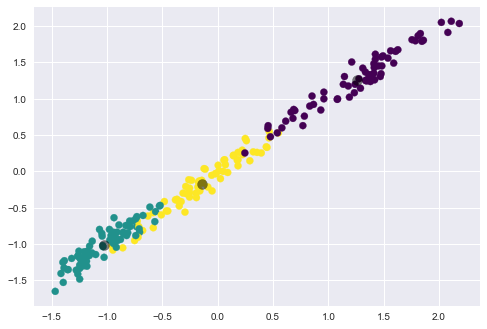

In [29]:
plt.scatter (X_std_seeds[:,0], X_std_seeds[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1],
             c = 'black', s = 100, alpha = 0.5)

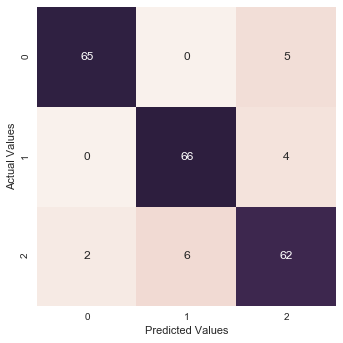

In [30]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')

##### Step F

In [31]:
X_norm_seeds = MinMaxScaler().fit_transform(X_seeds)
X_norm_seeds

array([[ 0.44098206,  0.50206612,  0.5707804 , ...,  0.48610121,
         0.18930164,  0.34515017],
       [ 0.40509915,  0.44628099,  0.66243194, ...,  0.50106914,
         0.03288302,  0.21516494],
       [ 0.34938621,  0.34710744,  0.87931034, ...,  0.50392017,
         0.25145302,  0.1506647 ],
       ..., 
       [ 0.24645892,  0.25826446,  0.7277677 , ...,  0.42908054,
         0.98166664,  0.26440177],
       [ 0.11803588,  0.16528926,  0.39927405, ...,  0.14682823,
         0.36834441,  0.25849335],
       [ 0.16147309,  0.19214876,  0.54718693, ...,  0.24518888,
         0.63346292,  0.26784835]])

In [35]:
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_norm_seeds)
y_model = kmeans.predict (X_norm_seeds)


##### Answer 7

In [34]:
acc_score = accuracy_score (y_test, y_model)
print("Accuracy:", acc_score)

Accuracy: 0.890476190476


This is a worse than previous.

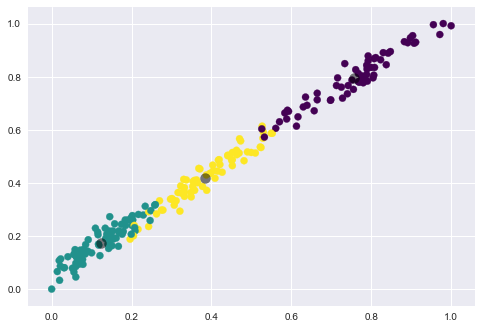

In [36]:
plt.scatter (X_norm_seeds[:,0], X_norm_seeds[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], 
                 c = 'black', s = 100, alpha = 0.5)

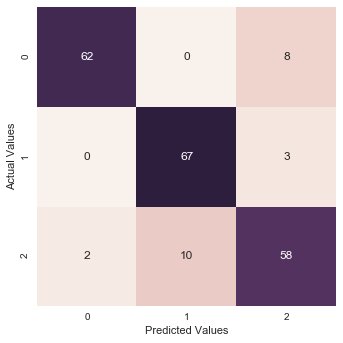

In [37]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')